<a href="https://colab.research.google.com/github/jneey2000/ML/blob/main/7_overfitting_and_underfitting_KR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
keras.__version__

'3.8.0'

In [ ]:
import keras
keras.__version__

'3.8.0'

# 과대적합과 과소적합

이 노트북은 [케라스 창시자에게 배우는 딥러닝](https://tensorflow.blog/%EC%BC%80%EB%9D%BC%EC%8A%A4-%EB%94%A5%EB%9F%AC%EB%8B%9D/) 책의 4장 4절의 코드 예제입니다. 책에는 더 많은 내용과 그림이 있습니다. 이 노트북에는 소스 코드에 관련된 설명만 포함합니다.

----

- 이전 장에 있던 세 가지 예제인 영화 리뷰 예측, 토픽 분류, 주택 가격 회귀 모두 홀드아웃 데이터에서 모델의 성능이 몇 번의 에포크 후에  
<U>최고치에 다다랐다가 감소되기 시작</U>했습니다.

<div>
<img src="https://drive.google.com/uc?export=view&id=1PR6PS4jRf4wNSVxHyl72p4EgTlMy4KHa" width="450"/>
</div>

<div>
<img src="https://drive.google.com/uc?export=view&id=1UtwwzxdckHMAi586AT6_ETltPFFDcifg" width="700"/>
</div>

- 즉, 모델이 금방 훈련 데이터에 과대적합되기 시작함.   

- 과대적합은 모든 머신 러닝 문제에서 발생함.  
머신 러닝을 마스터하려면 과대적합(overfitting)을 다루는 방법을 꼭 배워야 함.   

- 머신 러닝의 근본적인 이슈는 **최적화(optimization)와 일반화(generalization)** 사이의 줄다리기임
- **최적화(optimization)**: 가능한 훈련 데이터에서 최고의 성능을 얻으려고 모델을 조정하는 과정임(**머신 러닝의 학습**).  
- **일반화(generalization)**: 훈련된 모델이 이전에 본 적 없는 데이터에서 얼마나 잘 수행되는지를 의미함  
- **모델을 만드는 목적은 좋은 일반화 성능(generalization performance)을 얻는 것**임   
- 하지만 일반화 성능을 제어할 방법이 없음  
- 단지 훈련 데이터를 기반으로 모델을 조정할 수만 있음

<div>
<img src="https://drive.google.com/uc?export=view&id=17mfBwCVl_N2sAKVHVv_U4LXoUxMVbzuo" width="450"/>
</div>

- <font color="blue">**Underfitting (과소적합)**</font>: 훈련 데이터의 손실이 낮을수록 테스트 데이터의 손실이 낮음.  
이런 상황이 발생할 때 모델이 과소적합되었다고 말함.  
- Underfitting 상태에서는 모델의 성능이 계속 발전될 여지가 있음.  
- 즉, 네트워크가 훈련 데이터에 있는 관련 특성을 모두 학습하지 못했음.(**훈련데이터를 덜 배움**)  
- 하지만 훈련 데이터에 여러 번 반복 학습하고 나면 어느 시점부터 일반화 성능이 더이상 높아지지 않음.  
- <font color="blue">**Overfitting (과대적합, 과적합)**</font>: 검증 세트의 성능이 멈추고 감소되기 시작함.  
즉, 모델이 과대적합되기 시작함.  
- **Overfitting은 훈련 데이터에 특화된 패턴을 학습하기 시작했다는 의미함.**  
- 이 패턴은 새로운 데이터와 관련성이 적어 잘못된 판단을 하게 만듦

#### Overfitting 방지 방법
- 모델이 관련성이 없고 좋지 못한 패턴을 훈련 데이터에서 학습하지 못하도록 하려면  
<font color="blue">**가장 좋은 방법은 <U>더 많은 훈련 데이터를 모으는 것</U>임**</font>.  
  - 샘플수와 데이터분포 둘다 만족될 수 있음
- <font color="blue">**신경망의 파라미터의 수보다 훈련 데이터 샘플 수가 적을 때 과적합 발생  
  최선의 해결책 : 추가 데이터 수집**</font>

- 더 많은 데이터에서 훈련된 모델은 자연히 일반화 성능이 더 뛰어 남.  
(**훈련데이터 분포와 원래 데이터 분포가 일치하게 되기 때문임**)  
- **Regularization 방법**: 데이터를 더 모으는 것이 불가능할 때 차선책은  
<U>**모델이 수용할 수 있는 정보의 양을 조절**</U>하거나  
<U>**저장할 수 있는 정보에 제약을 가하는 것임.**</U>  
- 네트워크가 적은 수의 패턴만을 기억할 수 있다면 최적화 과정에서 **가장 중요한 패턴에 집중**하게 될 것임.  
- 이런 패턴은 더 나은 일반화 성능을 제공할 수 있음

- 이런 식으로 과대적합을 피하는 처리 과정을 **규제(regularization)**라고 함.  
- 가장 널리 사용되는 규제 기법을 알아보고  
이전 장에서 본 영화 리뷰 분류 모델에 실제로 적용해 성능을 향상시켜 보겠음.

### Common regularization techniques

- Data Acquisition (Gathering more data)
- Data Augmentation (synthetic Data generation)
- Adding weight regularization
- Adding dropout
- Reducing the network’s size
- Early Stopping

노트: 이 노트북에서는 편의상 IMDB 테스트 세트를 검증 세트로 사용합니다.

3장 5절에 있는 코드를 사용해 데이터를 준비합니다:

In [ ]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)
# 레이블을 벡터로 변환합니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# 과대적합

## 네트워크 크기 축소 (Reducing the network’s size)

- 과대적합을 막는 가장 단순한 방법은 **모델의 크기**, **즉 모델에 있는 학습 파라미터의 수를 줄이는 것**임.  
- 파라미터의 수는 층의 수와 각 층의 유닛 수에 의해 결정됨.  
- 딥러닝에서 모델에 있는 학습 파라미터의 수를 종종 **모델의 용량(capacity)**이라고 말함.  
-당연하게 파라미터가 많은 모델이 기억 용량이 더 많음.  
- 이 경우, 훈련 샘플과 타깃 사이를 딕셔너리와 같은 1:1 매핑으로 완벽하게 학습할 수도 있음.  
- 이런 매핑은 일반화 능력이 없음.   
- **항상 유념해야 할 것은 딥러닝 모델은 훈련 데이터에 잘 맞으려는 경향을 가진다는 것임.**  
(deep-learning models tend to be good at fitting to the training data)
- **하지만 진짜 문제는 최적화(optimization)가 아니고 일반화(generalization)임**

- 다른 한편으로 네트워크가 기억 용량에 제한이 있다면 이런 매핑을 쉽게 학습하지 못할 것임  
(if the network has limited memorization resources, it won’t be able to learn this mapping as easily)  
- 따라서 손실을 최소화하기 위해 타깃에 대한 예측 성능을 가진 압축된 표현을 학습해야 함.  
- 정확히 이런 표현이 우리의 관심 대상임.  
- 동시에 기억해야할 것은 <font color="blue">**과소적합(underfitting)되지 않도록 충분한 파라미터를 가진 모델을 사용해야 한다는 점**</font>임  
(At the same time, keep in mind that you should use models that have enough parameters that they don’t underfit)  
- **모델의 기억 용량이 부족해서는 안 됨**  
(your model shouldn’t be starved for memorization resources).  
- <font color="blue">**너무 많은 용량과 충분하지 않은 용량 사이의 절충점을 찾아야 함**</font>  
(There is a compromise to be found between too much capacity and not enough capacity)

- 안타깝지만 알맞은 층의 수나 각 층의 유닛 수를 결정할 수 있는 마법 같은 공식은 없음.  
(대안: AutoML의 일종인 NAS (Neural Architecture Search))  
- 데이터에 알맞는 모델 크기를 찾으려면 각기 다른 구조를  
(당연히 테스트 세트가 아니고 **검증 세트**에서) 평가해 보아야 함.  
- 적절한 모델 크기를 찾는 일반적인 작업 흐름은 비교적 적은 수의 층과 파라미터로 시작함
- 그 다음 검증 손실이 감소되기 시작할 때까지 층이나 유닛의 수를 늘리는 것임  
(<font color="blue"><U>저는 일반적으로 반대로 합니다. **과적합 후 층이나 유닛의 수를 줄여나감**</U></font>)

영화 리뷰 분류 모델에 적용해 보죠. 원래 네트워크는 다음과 같습니다:

In [ ]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


더 작은 네트워크로 바꾸어 보죠:

In [ ]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

원본 네트워크와 축소된 네트워크의 검증 손실을 비교해 보죠.  
점으로 표현된 것이 작은 네트워크이고 덧셈 기호가 원래 네트워크 입니다
(검증 손실이 작은 것이 좋은 모델입니다).

In [ ]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - acc: 0.7264 - loss: 0.5798 - val_acc: 0.8683 - val_loss: 0.3748
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.8979 - loss: 0.3056 - val_acc: 0.8851 - val_loss: 0.2963
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - acc: 0.9240 - loss: 0.2245 - val_acc: 0.8861 - val_loss: 0.2846
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.9367 - loss: 0.1850 - val_acc: 0.8839 - val_loss: 0.2884
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.9477 - loss: 0.1571 - val_acc: 0.8817 - val_loss: 0.3018
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - acc: 0.9518 - loss: 0.1422 - val_acc: 0.8769 - val_loss: 0.3226
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - acc: 0.9574 - loss: 0.1302 - val_acc: 0.8727 - val_loss: 0.3390
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.9626 - loss: 0.1102 - val_acc: 0.8706 - val_loss: 0.3549
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.9666

In [ ]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - acc: 0.7076 - loss: 0.6199 - val_acc: 0.8560 - val_loss: 0.4538
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - acc: 0.8820 - loss: 0.3978 - val_acc: 0.8788 - val_loss: 0.3491
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - acc: 0.9033 - loss: 0.3000 - val_acc: 0.8822 - val_loss: 0.3088
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.9188 - loss: 0.2410 - val_acc: 0.8862 - val_loss: 0.2858
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.9276 - loss: 0.2113 - val_acc: 0.8902 - val_loss: 0.2769
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - acc: 0.9372 - loss: 0.1855 - val_acc: 0.8890 - val_loss: 0.2774
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - acc: 0.9412 - loss: 0.1724 - val_acc: 0.8880 - val_loss: 0.2825
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - acc: 0.9479 - loss: 0.1537 - val_acc: 0.8836 - val_loss: 0.2943
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - acc: 0.9514

In [ ]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

In [ ]:
import matplotlib.pyplot as plt

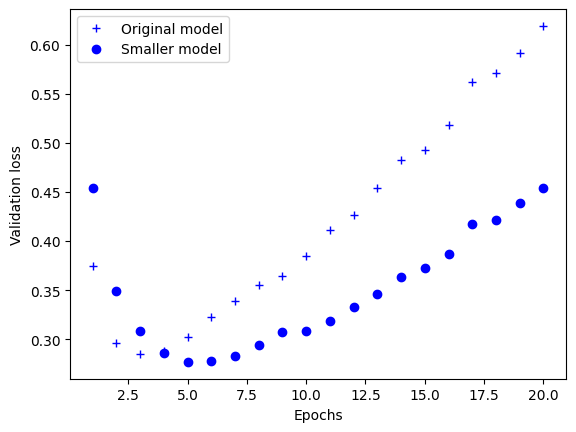

In [ ]:
# ‘b+’는 파란색 덧셈 기호을 의미합니다
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

- 여기서 볼 수 있듯이 작은 네트워크가 기본 네트워크보다 더 나중에 과대적합되기 시작함  
(네 번째 에포크가 아니라 여섯 번째 에포크에서).  
- 과대적합이 시작되었을 때 성능이 더 천천히 감소됨

이번에는 문제에 필요한 것보다 훨씬 더 많은 용량을 가진 네트워크를 비교해 보겠습니다:

In [ ]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(1024, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [ ]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 39s 765ms/step - acc: 0.6704 - loss: 0.6403 - val_acc: 0.8785 - val_loss: 0.3078
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 39s 731ms/step - acc: 0.8819 - loss: 0.2851 - val_acc: 0.8858 - val_loss: 0.2704
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 43s 776ms/step - acc: 0.9128 - loss: 0.2173 - val_acc: 0.8527 - val_loss: 0.3707
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 36s 731ms/step - acc: 0.9249 - loss: 0.1865 - val_acc: 0.8650 - val_loss: 0.3330
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 731ms/step - acc: 0.9591 - loss: 0.1135 - val_acc: 0.8547 - val_loss: 0.4139
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 51s 950ms/step - acc: 0.9723 - loss: 0.0812 - val_acc: 0.8788 - val_loss: 0.3826
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 37s 751ms/step - acc: 0.9870 - loss: 0.0497 - val_acc: 0.8750 - val_loss: 0.4414
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 40s 735ms/step - acc: 0.9891 - loss: 0.0468 - val_acc: 0.8819 - val_loss: 0.4323
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 738ms/

다음은 더 큰 네트워크가 기본 네트워크에 비해 얼마나 차이나는지를 보여줍니다. 점이 용량이 큰 네트워크의 검증 손실이고 덧셈 기호는 원본 네트워크의 검증 손실입니다.

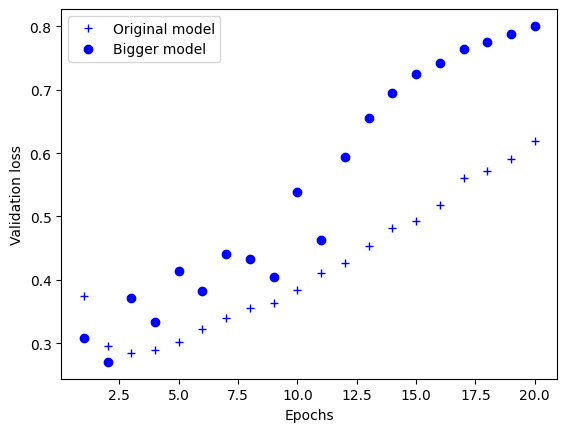

In [ ]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

- 용량이 큰 네트워크는 첫 번째 에포크 이후 거의 바로 과대적합이 시작되어 갈수록 더 심해짐.  
- 검증 손실도 매우 불안정함.

다음은 두 네트워크의 훈련 손실입니다:

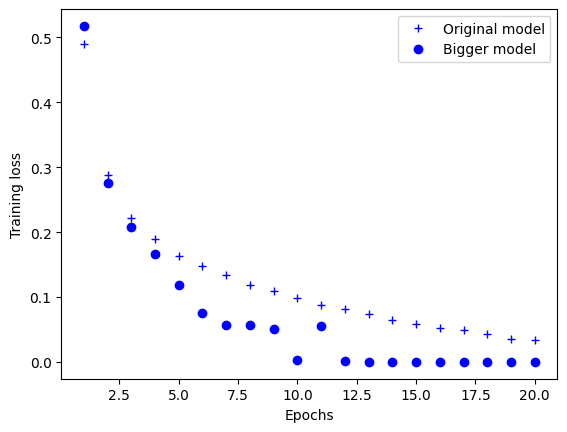

In [ ]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

- 여기서 볼 수 있듯이 용량이 큰 네트워크는 훈련 손실이 매우 빠르게 0에 가까워짐  
- 용량이 많은 네트워크일수록 더 빠르게 훈련 데이터를 모델링할 수 있음 (결국 훈련 손실이 낮아짐).  
- 하지만 더욱 과대적합에 민감해짐 (결국 훈련과 검증 손실 사이에 큰 차이가 발생함).

## 가중치 규제 추가 (Adding weight regularization)

- 오캄의 면도날 이론: 필요 이상으로 복잡한 설명을 도입하지 말라. 즉, 같은 설명력을 가진다면, 더 단순한 이론이나 모델이 낫다라는 것
- 간단한 모델이 복잡한 모델보다 덜 과대적합될 가능성이 높음.

- 여기에서 간단한 모델은 파라미터 값 분포의 엔트로피가 작은 모델임(또는 앞 절에서 본 것처럼 적은 수의 파라미터를 가진 모델임).  
- 그러므로 과대적합을 완화시키기 위한 일반적인 방법은  **네트워크의 복잡도에 제한을 두어 가중치가 작은 값을 가지도록 강제하는 것임.** -> 불필요한 파라미터를 자동으로 제거해 주는 효과  
- 가중치 값의 분포가 더 균일하게 됨.  
- 이를 **가중치 규제(Weight Regularization)**라고 하고 네트워크의 손실 함수에 큰 가중치에 연관된 비용을 추가함.  

두 가지 형태의 패널티 부과 방법이 있습니다.

* L1 규제 : 가중치의 절대값의 합에 비례하는 패널티를 추가하는 방식(가중치의 L1 노름).
* L2 규제 : 가중치의 제곱의 합에 비례하는 패널티를 추가하는 방식(가중치의 L2 노름).  
- **L2 규제**는 신경망에서 <font color="blue">**가중치 감쇠(Weight Decay)</font>**라고도 부름.

케라스에서 가중치 규제 인스턴스를 층의 키워드 매개변수로 전달하여 가중치 규제를 추가할 수 있습니다. 영화 리뷰 분류 네트워크에 L2 가중치 규제를 추가해 보죠:

<div>
<img src="https://drive.google.com/uc?export=view&id=1At_F0aOTMOSyMGOA_NI1RjLOG62yxJrr" width="600"/>
</div>

<div>
<img src="https://drive.google.com/uc?export=view&id=1NnY5yKhp4PtT5xNAdPDKOmKU3RW0GEQ7" width="700"/>
</div>

In [ ]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

- `l2(0.001)`는 가중치 행렬의 모든 원소를 제곱하고 `0.001`을 곱하여 네트워크의 전체 손실에 더해진다는 의미입니다.  
- <font color="blue">**이 페널티 항은 훈련할 때만 추가됨**</font>  
- 이 네트워크의 손실은 테스트보다 훈련할 때 더 높을 것입니다.

L2 규제 페널티의 효과를 확인해 보죠:

In [ ]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - acc: 0.7385 - loss: 0.6033 - val_acc: 0.8716 - val_loss: 0.3960
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - acc: 0.9049 - loss: 0.3352 - val_acc: 0.8892 - val_loss: 0.3391
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - acc: 0.9199 - loss: 0.2754 - val_acc: 0.8891 - val_loss: 0.3322
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - acc: 0.9351 - loss: 0.2461 - val_acc: 0.8743 - val_loss: 0.3613
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.9380 - loss: 0.2326 - val_acc: 0.8745 - val_loss: 0.3660
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - acc: 0.9399 - loss: 0.2248 - val_acc: 0.8694 - val_loss: 0.3841
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - acc: 0.9443 - loss: 0.2149 - val_acc: 0.8742 - val_loss: 0.3727
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - acc: 0.9486 - loss: 0.2074 - val_acc: 0.8787 - val_loss: 0.3649
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - acc: 0.948

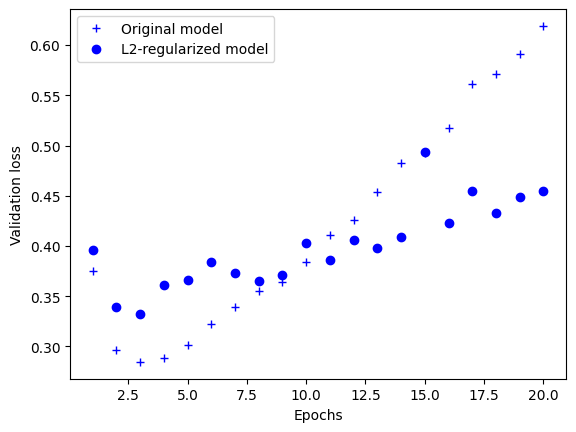

In [ ]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

- 여기서 볼 수 있듯이 두 모델이 동일한 파라미터 수를 가지고 있더라도 L2 규제를 사용한 모델(점)이 기본 모델(덧셈 기호)보다 훨씬 더 과대적합에 잘 견디고 있습니다.

케라스에서 L2 규제 대신에 다음과 같은 가중치 규제 중 하나를 사용할 수 있습니다:

```python
from keras import regularizers

# L1 규제
regularizers.l1(0.001)

# L1과 L2 규제 병행
regularizers.l1_l2(l1=0.001, l2=0.001)
```

### l1(0.0001) 모델과 비교

In [ ]:
from keras import models
from keras import layers
from keras import regularizers

l1_model = models.Sequential()
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu', input_shape=(10000,)))
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [ ]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - acc: 0.7413 - loss: 0.7195 - val_acc: 0.8732 - val_loss: 0.4486
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - acc: 0.8966 - loss: 0.3861 - val_acc: 0.8895 - val_loss: 0.3643
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - acc: 0.9100 - loss: 0.3197 - val_acc: 0.8865 - val_loss: 0.3555
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.9197 - loss: 0.2902 - val_acc: 0.8881 - val_loss: 0.3485
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - acc: 0.9270 - loss: 0.2722 - val_acc: 0.8796 - val_loss: 0.3668
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - acc: 0.9302 - loss: 0.2654 - val_acc: 0.8826 - val_loss: 0.3627
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.9318 - loss: 0.2584 - val_acc: 0.8847 - val_loss: 0.3614
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - acc: 0.9376 - loss: 0.2486 - val_acc: 0.8667 - val_loss: 0.4162
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.9375

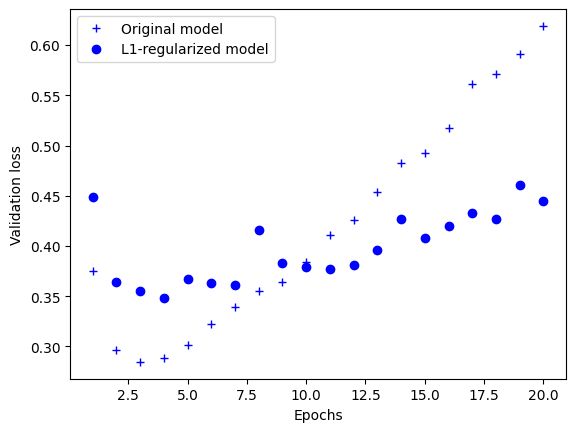

In [ ]:
import matplotlib.pyplot as plt

l1_model_val_loss = l1_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1_model_val_loss, 'bo', label='L1-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

### l1_l2(l1=0.0001, l2=0.0001)모델과 비교

In [ ]:
l1l2_model = models.Sequential()
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                            activation='relu', input_shape=(10000,)))
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                            activation='relu'))
l1l2_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
l1l2_model.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['acc'])

In [ ]:
l1l2_model_hist = l1l2_model.fit(x_train, y_train,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - acc: 0.7266 - loss: 0.7387 - val_acc: 0.8760 - val_loss: 0.4673
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - acc: 0.8951 - loss: 0.4130 - val_acc: 0.8808 - val_loss: 0.3886
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - acc: 0.9068 - loss: 0.3439 - val_acc: 0.8892 - val_loss: 0.3641
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - acc: 0.9135 - loss: 0.3182 - val_acc: 0.8887 - val_loss: 0.3597
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - acc: 0.9180 - loss: 0.3044 - val_acc: 0.8845 - val_loss: 0.3693
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.9185 - loss: 0.3019 - val_acc: 0.8729 - val_loss: 0.3908
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - acc: 0.9159 - loss: 0.3043 - val_acc: 0.8820 - val_loss: 0.3725
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - acc: 0.9205 - loss: 0.2912 - val_acc: 0.8808 - val_loss: 0.3781
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - acc: 0.9265

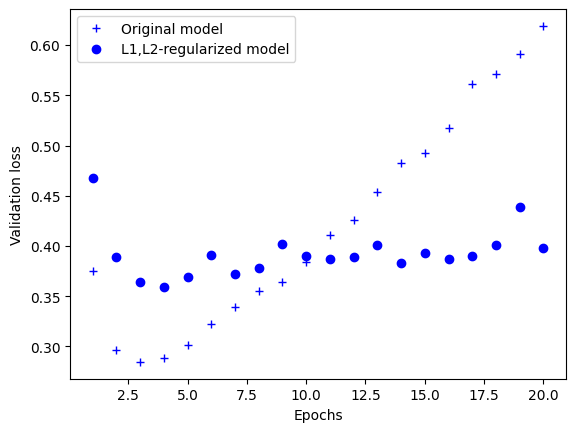

In [ ]:
l1l2_model_val_loss = l1l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1l2_model_val_loss, 'bo', label='L1,L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

As an alternative to L2 regularization, you can use one of the following [Keras weight regularizers](https://keras.io/regularizers/).

## 드롭아웃 추가 (Adding dropout)

- **Dropout(드롭아웃)**은 토론토 대학의 제프리 힌튼과 그의 학생들이 개발함  
- 신경망을 위해 사용되는 규제 기법 중에서 가장 효과적이고 널리 사용되는 방법 중에 하나임  
- <font color="blue">**네트워크의 층에 드롭아웃을 적용하면 <U>훈련하는 동안 무작위로 층의 일부 출력 특성을 제외시킴(0으로 만듦)</U>**</font>  
- 한 층이 정상적으로 훈련하는 동안에는 어떤 입력 샘플에 대해 `[0.2, 0.5, 1.3, 0.8, 1.1]` 벡터를 출력한다고 가정하면  
드롭아웃을 적용하면 이 벡터의 일부가 무작위로 0으로 바뀜.  
예를 들면 `[0, 0.5, 1.3, 0, 1.1]`이 됨.
- 드롭아웃 비율은 0이 될 특성의 비율임. 보통 0.2에서 0.5 사이로 지정됨.  
- <font color="blue">**테스트 단계에서는 어떤 유닛도 드롭아웃되지 않음.**</font>  
대신에 층의 출력을 드롭아웃 비율에 비례하여 줄여 줌.  
훈련할 때보다 더 많은 유닛이 활성화되기 때문임.

즉, 훈련 중에는 각 뉴런을 일정 확률 p로 비활성화 해줌
예를 들어, p=0.5 이면, 절반의 뉴런을 무작위로 drop 해주는 것임
이렇게 되면 네트워크가 항상 조금씩 다른 형태로 학습되는 앙상블 효과를 볼 수가 있음.
다만, 테스트 시에는 모든 뉴런을 활성화 한채로 사용하기 때문에, 출력값의 학습 단계의 dropout 비율에 맞게 scaling 해줌.  
다시 말해, 테스트 시 모든 뉴런 출력에 1-p를 곱해서(출력을 조정하여) 학습 중 적용했던 dropout의 영향을 보정해 주는 것임

크기가 `(batch_size, features)`인 한 층의 출력을 담고 있는 넘파이 행렬을 생각해 보겠음. 훈련할 때는 이 행렬의 값의 일부가 랜덤하게 0이 됨:

<div>
<img src="https://drive.google.com/uc?export=view&id=11GjlATnONXfbMGdByZ7UE-U8xF7JoxkB" width="600"/>
</div>

- **매 iteration마다 다른 구조의 신경망이 학습되는 효과**  
  --> 입력과 출력의 매핑을 그대로 학습하는 것을 방해
- **결과적으로 다양한 구조의 신경망이 앙상블되는 효과**

```python
# 훈련할 때 유닛의 출력 중 50%를 버립니다
layer_output *= np.random.randint(0, high=2, size=layer_output.shape)
```

테스트할 때는 드롭아웃 비율로 출력을 낮추어 주어야 합니다. 여기에서는 0.5배만큼 스케일을 조정했습니다(앞에서 절반의 유닛을 드롭아웃했으므로):

```python
# 테스트 단계
layer_output *= 0.5
```

훈련 단계에 이 두 연산을 포함시켜 테스트 단계에는 출력을 그대로 두도록 구현할 수 있습니다. 실제로 종종 이런 방식으로 구현합니다:

실제로 Keras, Pytorch 등에서는 테스트 시에는 출력을 그대로 사용(추가 조정 없음)하고 학습 시에 scaling을 해주는 방법을 많이 사용합니다.

```python
# 훈련 단계
layer_output *= np.randint(0, high=2, size=layer_output.shape)
# 여기에서 스케일을 낮추는 대신 높입니다![image.png](attachment:image.png)
layer_output /= 0.5
```

<div>
<img src="https://drive.google.com/uc?export=view&id=1iab_B2tEtfDbvyV0OnmAshLMM69xwmfR" width="800"/>
</div>

- 이 기법이 이상하고 무계획적으로 보일 수 있습니다.  
- 왜 드롭아웃이 과대적합을 줄이는 데 도움이 될까요?  
- **힌튼은 은행에서 사용하는 부정 방지 메커니즘에서 착안**했다고 함.  
- 그의 말을 빌리면 “은행에 갔을 때 행원들이 계속 바뀌길래 왜 그런지를 물었습니다.  
- 자신들도 이유는 모르지만 자주 업무가 바뀐다고 했습니다.  
- 나는 은행에서 부정 행위를 하려면 직원들 사이의 유대가 필요하기 때문이라고 판단했습니다.  
- 각 샘플에 대해 뉴런의 일부를 무작위하게 제거하면 뉴런의 부정한 협업을 방지하고 결국 과대적합을 감소시킨다는 것을 깨달았습니다."

- 핵심 아이디어는 층의 출력 값에 노이즈를 추가하여 중요하지 않은 우연한 패턴(힌튼이 이야기한 부정한 협업)을 깨뜨리는 것입니다.  
- 노이즈가 없다면 네트워크가 이 패턴을 기억하기 시작할 것입니다.

케라스에서는 층의 출력 바로 뒤에 `Dropout` 층을 추가하여 네트워크에 드롭아웃을 적용할 수 있습니다:

```python
model.add(layers.Dropout(0.5))
```

IMDB 네트워크에 두 개의 `Dropout` 층을 추가하고 과대적합을 얼마나 줄여주는지 확인해 보겠습니다:

In [ ]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [ ]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - acc: 0.6009 - loss: 0.6473 - val_acc: 0.8603 - val_loss: 0.4953
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - acc: 0.7907 - loss: 0.4938 - val_acc: 0.8802 - val_loss: 0.3947
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - acc: 0.8637 - loss: 0.3953 - val_acc: 0.8738 - val_loss: 0.3465
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - acc: 0.8943 - loss: 0.3377 - val_acc: 0.8863 - val_loss: 0.3156
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - acc: 0.9109 - loss: 0.2969 - val_acc: 0.8861 - val_loss: 0.3003
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.9225 - loss: 0.2611 - val_acc: 0.8845 - val_loss: 0.3006
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.9353 - loss: 0.2267 - val_acc: 0.8692 - val_loss: 0.3143
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - acc: 0.9377 - loss: 0.2116 - val_acc: 0.8783 - val_loss: 0.3197
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - acc: 0.9456

결과 그래프를 그려 보죠:

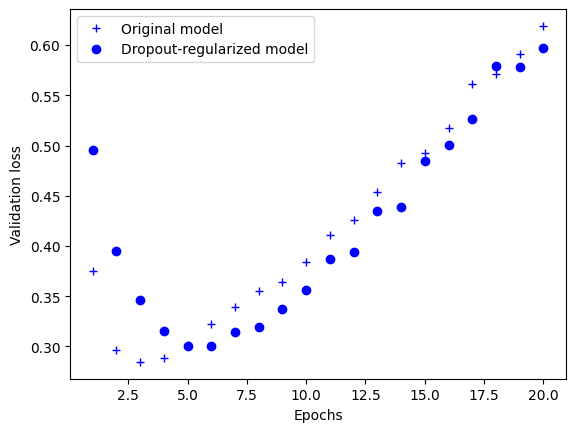

In [ ]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

여기에서도 기본 네트워크보다 확실히 향상되었습니다.

정리하면 신경망에서 과대적합을 방지하기 위해 가장 널리 사용하는 방법은 다음과 같음:

* <font color="blue">**훈련 데이터를 더 모음 (Get more training data)**
* **Data Augmentation (데이터 증폭)**
* **네트워크의 용량을 감소시킴**
* **가중치 규제를 추가함**
* **드롭아웃을 추가함**
* **Early Stopping**</font>